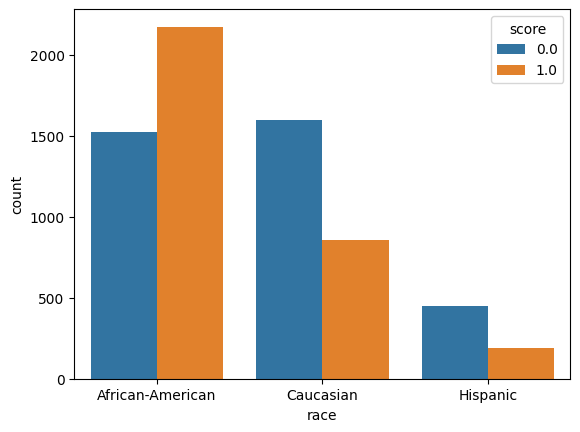

In [2]:
# First, we will ensure that we can successfully import the aequitas framework

import aequitas
import pandas as pd
import seaborn as sns

# next, we will design a dataframe that is suitable for the aequitas framework. 
# Input data must have at least one sensitive variable (race, age, sex, income)
# The label value must be binary and the score value can be binary or continuous

'''
Below, you will find a link to the COMPAS dataset that describes rates of crime recidivism among
different demographic groups. Import the dataset and run the graph below to display the rates
of crime recidivism among different ethnic groups.
'''

aequitas_df = pd.read_csv("../data/compas_for_aequitas.csv")

# print the output of your aequitas_df

by_race = sns.countplot(x="race", hue="score", data=aequitas_df[aequitas_df.race.isin(['African-American', 'Caucasian', 'Hispanic'])])

In [ ]:
'''
In this exercise, we will use Aequitas to compute the crosstabular metrics
which can be used to subsequently calculate disparity metrics between groups below.
'''

from aequitas import Audit
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
from aequitas.group import Group

# first, import the Group() function
# Next, calculate the crosstabs for your dataset and print them out below

g = Group()
xtab, _ = g.get_crosstabs(aequitas_df)



#bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'}, alpha=0.05, mask_significance=True)

In [4]:
'''
Disparities Calculated:

True Positive Rate Disparity - ‘tpr_disprity’

True Negative Rate - ‘tnr_disparity’

False Omission Rate - ‘for_disparity’

False Discovery Rate - ‘fdr_disparity’

False Positive Rate - ‘fpr_disparity’

False NegativeRate - ‘fnr_disparity’

Negative Predictive Value - ‘npv_disparity’

Precision Disparity - ‘precision_disparity’

Predicted Positive Ratio_k Disparity - ‘ppr_disparity’

Predicted Positive Ratio_g Disparity - ‘pprev_disparity’
'''

# Next, import the Bias() function and set it to a variable

b = Bias()

# Now, use the get_disparity_predefined_groups function to set a reference group and calculate disparity relative to that reference group

hbdf = b.get_disparity_predefined_groups(xtab, original_df=aequitas_df,
                                         ref_groups_dict={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'},
                                         alpha=0.05,
                                         mask_significance=False)

# Finally, print out the disparity calculations for visualization below

In [10]:
hbdf[['attribute_name','attribute_value','fpr_disparity','fnr_disparity']]

,attribute_name,attribute_value,fpr_disparity,fnr_disparity
0,race,African-American,1.912093,0.586416
1,race,Asian,0.370749,0.698482
2,race,Caucasian,1.000000,1.000000
3,race,Hispanic,0.915887,1.165140
4,race,Native American,1.598854,0.209544
5,race,Other,0.629057,1.417970
6,sex,Female,0.990343,1.055810
7,sex,Male,1.000000,1.000000
8,age_cat,25 - 45,1.000000,1.000000
9,age_cat,Greater than 45,0.503031,1.531238


<b>In the space below, describe what the False Positive Ratio and the False Negative Rate tell you about the disparities between the groups:</b>

<i>The model we have trained has proclivity to suspect African Americans, Native Americans, and people under the age of 25 as shown with it's higher rate of 'fpr_disparity'. Hispanics receive a boost with a slightly higher false negative rate and people over the age of 45 see a significantly higher false negative rate. Hence, they are less likely to be predicted as repeat offenders by the model.

The goal in the future should be to reduce the bias in both of these areas.</i>